In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
!pip install plotnine
!pip install missingno
!pip install folium 

    100% |████████████████████████████████| 3.6MB 10.8MB/s 
    100% |████████████████████████████████| 8.9MB 4.9MB/s 
    100% |████████████████████████████████| 61kB 21.9MB/s 
    100% |████████████████████████████████| 12.9MB 3.6MB/s 
    100% |████████████████████████████████| 81kB 26.3MB/s 
    100% |████████████████████████████████| 952kB 20.6MB/s 
yellowbrick 0.9 has requirement matplotlib<3.0,>=1.5.1, but you'll have matplotlib 3.0.2 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0
  Found existing installation: matplotlib 2.1.2
    Uninstalling matplotlib-2.1.2:
      Successfully uninstalled matplotlib-2.1.2


In [4]:
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

from plotnine import *
import plotnine

In [0]:
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

In [0]:
import pandas as pd
import numpy as np
from plotnine import *

In [7]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/opengovlab/seoul-bike-2018_2_4.csv', 
                 encoding='cp949')
# 2018년 1,2분기 데이터
# df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/opengovlab/seoul-bike-2018.csv', encoding='cp949')
df.shape

(586304, 11)

In [8]:
df.head(10)

,'자전거번호','대여일시','대여대여소번호','대여대여소명','대여거치대','반납일시','반납대여소번호','반납대여소명','반납거치대','이용시간(분)','이용거리(M)'
0,'SPB-11906','2018-06-16 00:00:07','932',' 예일여중',1,'2018-06-16 00:16:41','934',' 신사동 성당',11,15,2160
1,'SPB-16954','2018-06-16 00:00:07','272',' 당산육갑문',16,'2018-06-16 02:00:36','1827',' 독산보도육교 앞 자전거 보관소',9,120,18100
2,'SPB-09676','2018-06-16 00:00:11','1036',' 고덕동 주양쇼핑',7,'2018-06-16 00:24:05','1038',' 강일 다솜 어린이 공원',9,23,3350
3,'SPB-07143','2018-06-16 00:00:15','1726',' 삼익세라믹아파트교차로',7,'2018-06-16 00:15:31','1706',' 기업은행 앞',9,14,1480
4,'SPB-13007','2018-06-16 00:00:16','2058',' 노량진동 맥도널드앞',10,'2018-06-16 00:14:25','258',' 신길역3번출구',8,13,2920
5,'SPB-04506','2018-06-16 00:00:27','818',' 숙명여대 입구 교차로',7,'2018-06-16 00:07:11','819',' 선린인터넷 고등학교',7,6,620
6,'SPB-03482','2018-06-16 00:00:30','2050',' 노량진역 5번출구',5,'2018-06-16 00:04:15','2007',' 유한양행앞',3,3,600
7,'SPB-11996','2018-06-16 00:00:31','1946',' 구로역 광장',5,'2018-06-16 00:15:12','1912',' 한신휴아파트 앞',10,14,1990
8,'SPB-05533','2018-06-16 00:00:33','2060',' 남성역3번출구 뒤',1,'2018-06-16 00:07:02','2032',' 이수역 11번출구쪽',8,6,1050
9,'SPB-18427','2018-06-16 00:00:34','207',' 여의나루역 1번출구 앞',5,'2018-06-16 01:13:08','1141',' 곰달래 문화복지센터 1-1',10,72,14390


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586304 entries, 0 to 586303
Data columns (total 11 columns):
'자전거번호'      586304 non-null object
'대여일시'       586304 non-null object
'대여대여소번호'    586304 non-null object
'대여대여소명'     586304 non-null object
'대여거치대'      586304 non-null int64
'반납일시'       586304 non-null object
'반납대여소번호'    586304 non-null object
'반납대여소명'     586304 non-null object
'반납거치대'      586304 non-null int64
'이용시간(분)'    586304 non-null int64
'이용거리(M)'    586304 non-null int64
dtypes: int64(4), object(7)
memory usage: 49.2+ MB


In [0]:
df.columns = df.columns.str.strip("'")

In [11]:
df.isnull().sum()

자전거번호      0
대여일시       0
대여대여소번호    0
대여대여소명     0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간(분)    0
이용거리(M)    0
dtype: int64

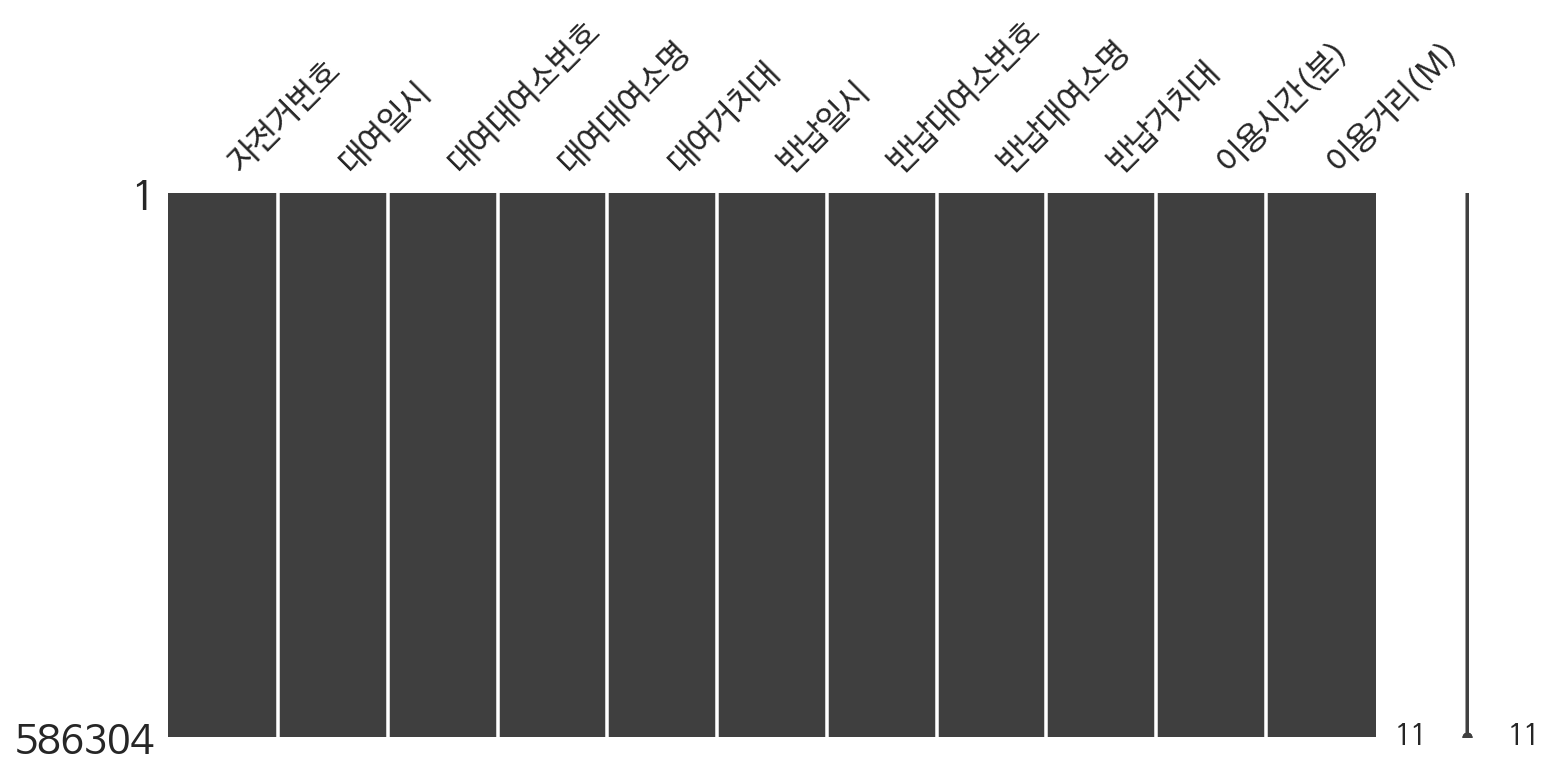

In [12]:
import missingno as msno

msno.matrix(df, figsize=(12,5))

In [13]:
print('# 대여소 수')
print('대여 대여소: ', df['대여대여소번호'].unique().shape[0])
print('반납 대여소: ', df['반납대여소번호'].unique().shape[0])

# 대여소 수
대여 대여소:  1267
반납 대여소:  1269


In [14]:
df['대여대여소번호'].value_counts().tail(10)

'2343'        39
'1101'        38
'2288'        29
'741'         27
'2275'        26
'1040'        25
'2287'        21
'2286'        16
'상암센터 정비실'     8
'554'          5
Name: 대여대여소번호, dtype: int64

In [15]:
df['대여대여소명'].value_counts().head(30)

' 여의나루역 1번출구 앞'               4073
' 뚝섬유원지역 1번출구 앞'              3369
' 홍대입구역 2번출구 앞'               3174
' 봉림교 교통섬'                    2709
' 롯데월드타워(잠실역2번출구 쪽)'          2637
' 고속터미널역 8-1번, 8-2번 출구 사이'    2453
' 마포구민체육센터 앞'                 2178
' 신도림역 1번 출구 앞'               2022
' 안암로터리 버스정류장 앞'              1987
' 잠실새내역 5번 출구 뒤'              1841
' 건국대학교 (입학정보관)'              1810
' IFC몰'                       1721
' 광진구의회 앞'                    1610
' CJ 드림시티'                    1586
' 몽촌토성역 1번출구 옆'               1585
' 오목교역 7번출구 앞'                1585
' 합정역 7번출구 앞'                 1547
' 당산역 10번출구 앞'                1540
' 옥수역 3번출구'                   1527
' 하늘채코오롱아파트 건너편'              1524
' 방이삼거리'                      1496
' 신용산역 6번출구 앞'                1483
' 마포구청 앞'                     1466
' 구로디지털단지역 앞'                 1447
' 당산육갑문'                      1401
' 가양역 8번출구'                   1378
' 여의도역 1번출구 옆'                1374
' 양천향교역 7번출구앞'                1357
' 자양사거리 광진아크로텔 앞'   

In [16]:
df.groupby(['대여대여소명'])['이용거리(M)'].mean(
).reset_index().sort_values(by='이용거리(M)', ascending=False).head(10)

,대여대여소명,이용거리(M)
353,' 동작역 5번출구 동작주차공원',10454.240000
330,' 독산보도육교 앞 자전거 보관소',10401.840607
810,' 신한은행 시흥대로금융센터지점',9857.738095
280,' 달맞이공원',9639.504950
1166,' 한내근린공원 남측',9419.090909
1197,' 현대자동차서비스 앞',9364.282178
419,' 망원초록길 입구',9160.294118
1194,' 현대고등학교 건너편',9047.614350
1231,' 흑석역 1번출구',8938.909300
1113,' 청계천 생태교실 앞',8923.918819


In [17]:
df.groupby(['대여대여소명'])['이용거리(M)'].mean(
).reset_index().sort_values(by='이용거리(M)', ascending=True).head()

,대여대여소명,이용거리(M)
1249,'상암센터 정비실',256.250000
188,' 국군복지단',1828.244275
7,' CJ오쇼핑앞',1832.727273
100,' 건국대학교 과학관(이과대) 앞',2143.065327
937,' 원남동사거리',2234.752294


In [18]:
df.groupby(['대여대여소명'])['이용시간(분)'].mean(
).reset_index().sort_values(by='이용시간(분)', ascending=False).head()

,대여대여소명,이용시간(분)
280,' 달맞이공원',59.782178
353,' 동작역 5번출구 동작주차공원',59.484000
93,' 개화동상사마을종점 버스정류장',55.500000
649,' 서울숲 남문 버스정류소 옆',55.495074
648,' 서울숲 관리사무소',55.492228


In [19]:
df.groupby(['대여대여소명'])['이용시간(분)'].mean(
).reset_index().sort_values(by='이용시간(분)', ascending=True).head()

,대여대여소명,이용시간(분)
7,' CJ오쇼핑앞',11.416667
1249,'상암센터 정비실',12.000000
188,' 국군복지단',12.022901
1089,' 참새공원(백곡경노당)',12.666667
575,' 삼일초등학교 인근',14.460274


In [20]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])
df.dtypes

자전거번호              object
대여일시       datetime64[ns]
대여대여소번호            object
대여대여소명             object
대여거치대               int64
반납일시       datetime64[ns]
반납대여소번호            object
반납대여소명             object
반납거치대               int64
이용시간(분)             int64
이용거리(M)             int64
dtype: object

In [21]:
df['대여년'] = df['대여일시'].dt.year
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여시'] = df['대여일시'].dt.hour
df['대여분'] = df['대여일시'].dt.minute
df['대여요일'] = df['대여일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여분', '대여요일'],
      dtype='object')

In [22]:
df['반납년'] = df['반납일시'].dt.year
df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납시'] = df['반납일시'].dt.hour
df['반납분'] = df['반납일시'].dt.minute
df['반납요일'] = df['반납일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여분', '대여요일', '반납년', '반납월', '반납일', '반납시', '반납분', '반납요일'],
      dtype='object')

In [23]:
df_day_1 = df['대여일'].value_counts().reset_index()
df_day_1.columns = ['day', 'count']
df_day_1

,day,count
0,21,47319
1,22,47024
2,19,46839
3,20,46107
4,25,46105
5,16,46038
6,23,45274
7,17,43161
8,29,42313
9,27,40698


In [24]:
df_day_1 = df['대여일'].value_counts().reset_index()
df_day_1.columns = ['day', 'count']

df_day_1 = df_day_1.sort_values('day')
df_day_1['대여반납'] = '대여'
print(df_day_1.shape)

df_day_2 = df['반납일'].value_counts().reset_index()
df_day_2.columns = ['day', 'count']
df_day_2 = df_day_2.sort_values('day')
df_day_2['대여반납'] = '반납'
print(df_day_2.shape)

df_day = pd.concat([df_day_1, df_day_2])
print(df_day.shape)
df_day

(15, 3)
(18, 3)
(33, 3)


,day,count,대여반납
5,16,46038,대여
7,17,43161,대여
11,18,35828,대여
2,19,46839,대여
3,20,46107,대여
0,21,47319,대여
1,22,47024,대여
6,23,45274,대여
10,24,39164,대여
4,25,46105,대여


In [25]:
df_dow_1 = df['대여요일'].value_counts().reset_index()
df_dow_1.columns = ['dayofweek', 'count']
df_dow_1 = df_dow_1.sort_values('dayofweek')
df_dow_1['대여반납'] = '대여'
print(df_dow_1.shape)

df_dow_2 = df['반납요일'].value_counts().reset_index()
df_dow_2.columns = ['dayofweek', 'count']
df_dow_2 = df_dow_2.sort_values('dayofweek')
df_dow_2['대여반납'] = '반납'
print(df_dow_2.shape)

df_dow = pd.concat([df_dow_1, df_dow_2])
print(df_dow.shape)

(7, 3)
(7, 3)
(14, 3)


In [0]:
weekday_map= {0:'MON', 1:'TUE', 2:'WED', 3:'THU',
              4:'FRI', 5:'SAT', 6:'SUN'}

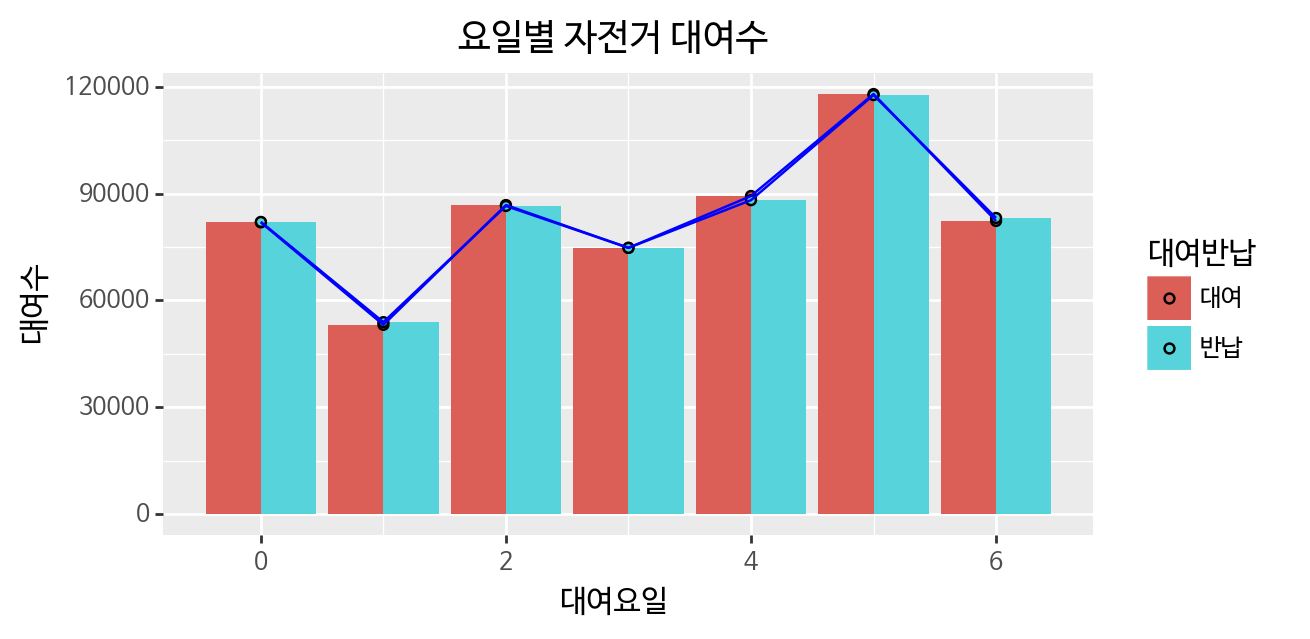

<ggplot: (-9223363263657281073)>

In [27]:
(ggplot(df_dow)
 + aes(x='dayofweek', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='대여요일', y='대여수', title='요일별 자전거 대여수')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(6,3))
)

In [28]:
df_hour_1 = df['대여시'].value_counts().reset_index()
df_hour_1.columns = ['hour', 'count']
df_hour_1 = df_hour_1.sort_values('hour')
df_hour_1['대여반납'] = '대여'
df_hour_1.head()

df_hour_2 = df['반납시'].value_counts().reset_index()
df_hour_2.columns = ['hour', 'count']
df_hour_2 = df_hour_2.sort_values('hour')
df_hour_2['대여반납'] = '반납'
df_hour_2.head()

df_hour = pd.concat([df_hour_1, df_hour_2])
df_hour.head()

,hour,count,대여반납
13,0,19837,대여
17,1,15358,대여
19,2,12255,대여
21,3,7462,대여
23,4,4392,대여


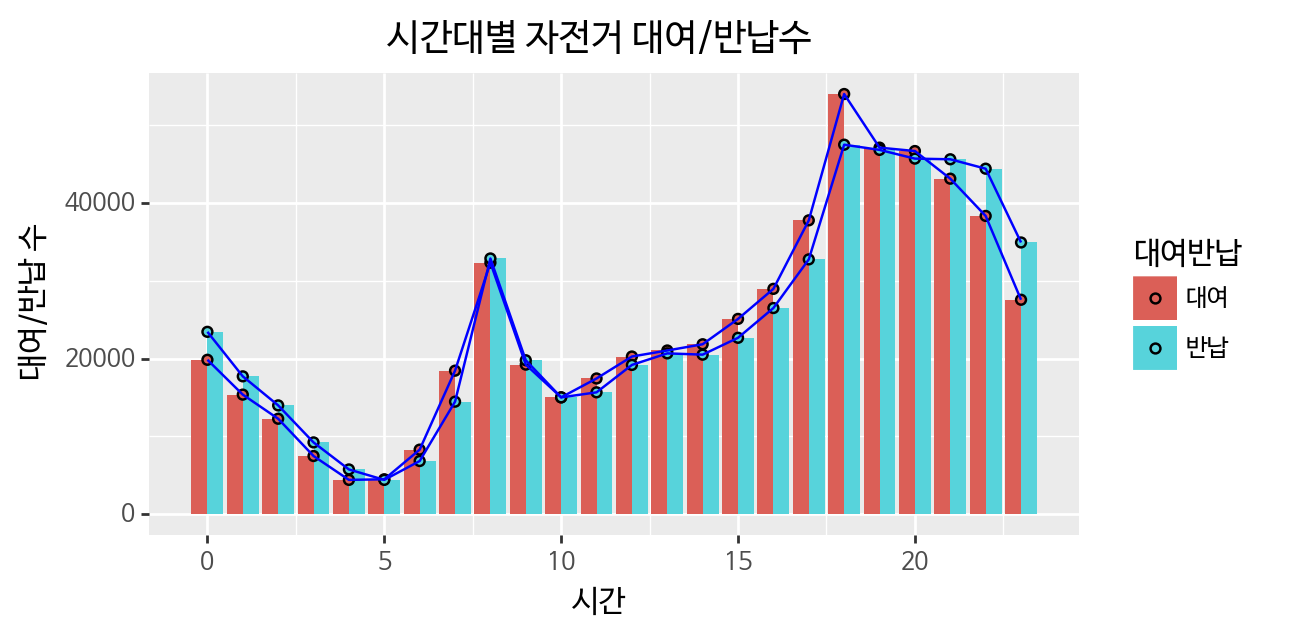

<ggplot: (8773197410424)>

In [29]:
(ggplot(df_hour)
 + aes(x='hour', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='시간', y='대여/반납 수', title='시간대별 자전거 대여/반납수')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(6,3))
)

In [30]:
df_minute_1 = df['대여분'].value_counts().reset_index()
df_minute_1.columns = ['minute', 'count']
df_minute_1 = df_minute_1.sort_values('minute')
df_minute_1['대여반납'] = '대여'
print(df_minute_1.shape)

df_minute_2 = df['반납분'].value_counts().reset_index()
df_minute_2.columns = ['minute', 'count']
df_minute_2 = df_minute_2.sort_values('minute')
df_minute_2['대여반납'] = '반납'
print(df_minute_2.shape)

df_minute = pd.concat([df_minute_1, df_minute_2])
print(df_minute.shape)

(60, 3)
(60, 3)
(120, 3)


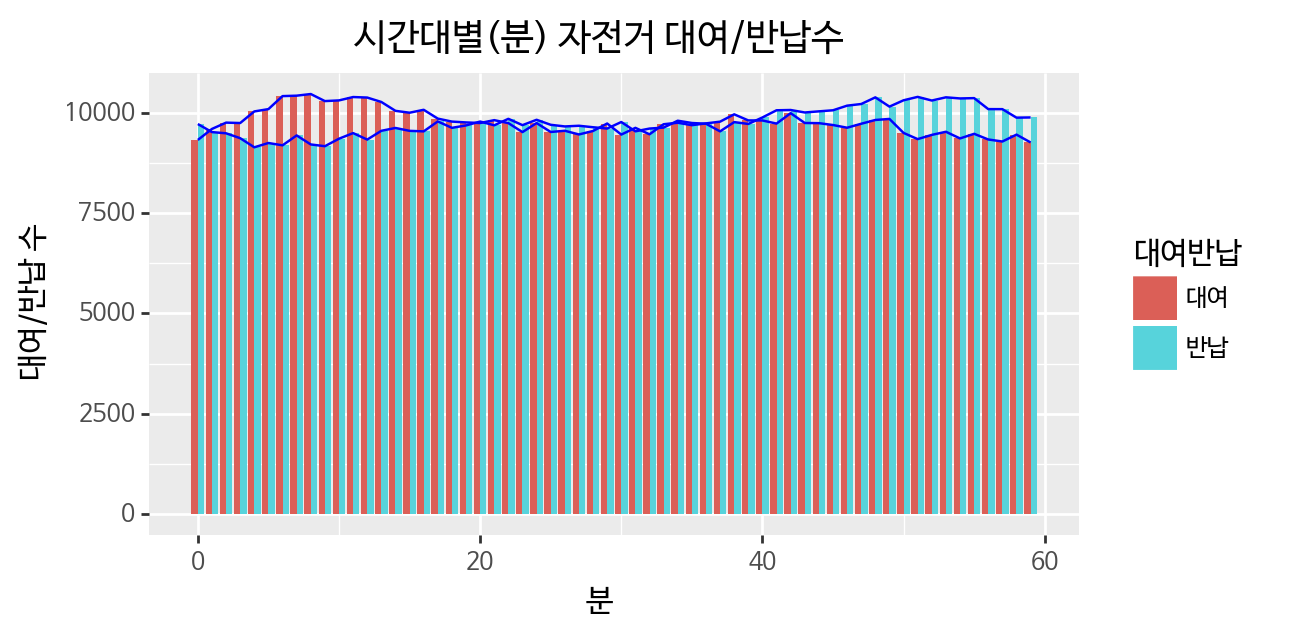

<ggplot: (-9223363263658103243)>

In [31]:
(ggplot(df_minute)
 + aes(x='minute', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + geom_line(color='blue')
 + labs(x='분', y='대여/반납 수', title='시간대별(분) 자전거 대여/반납수')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(6,3))
)

In [32]:
df['같은대여반납소'] = df['대여대여소명'] == df['반납대여소명']
df['같은대여반납소']

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27         True
28        False
29        False
          ...  
586274    False
586275    False
586276    False
586277    False
586278    False
586279    False
586280    False
586281    False
586282    False
586283    False
586284    False
586285    False
586286    False
586287    False
586288     True
586289    False
586290     True
586291    False
586292    False
586293    False
586294     True
586295    False
586296    False
586297    False
586298    False
586299    False
586300    False
586301    False
586302    False
586303    False
Name: 같은대여반납소, Length: 5

In [33]:
df_location_diff = df['같은대여반납소'].value_counts().reset_index()
df_location_diff.columns = ['일치여부', '대여반납수']
df_location_diff

,일치여부,대여반납수
0,False,520100
1,True,66204


In [34]:
df_location_diff = df['같은대여반납소'].value_counts().reset_index()
df_location_diff.columns = ['일치여부', '대여반납수']
location_diff_ratio = df_location_diff['대여반납수'][0]/df_location_diff['대여반납수'][1]
print('같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 {0:.2f}배 많다.'.format(location_diff_ratio))
df_location_diff

같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 7.86배 많다.


,일치여부,대여반납수
0,False,520100
1,True,66204


In [35]:
df_same_loc = df.loc[df['같은대여반납소'] == True]
df_same_loc.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여시,대여분,대여요일,반납년,반납월,반납일,반납시,반납분,반납요일,같은대여반납소
27,'SPB-09000',2018-06-16 00:01:22,'2025',' 흑석역 1번출구',13,2018-06-16 01:10:42,'2025',' 흑석역 1번출구',9,67,...,0,1,5,2018,6,16,1,10,5,True
34,'SPB-08794',2018-06-16 00:01:32,'2025',' 흑석역 1번출구',10,2018-06-16 01:10:42,'2025',' 흑석역 1번출구',15,64,...,0,1,5,2018,6,16,1,10,5,True
40,'SPB-02178',2018-06-16 00:01:47,'1308',' 안암로터리 버스정류장 앞',3,2018-06-16 01:52:14,'1308',' 안암로터리 버스정류장 앞',4,110,...,0,1,5,2018,6,16,1,52,5,True
42,'SPB-06487',2018-06-16 00:01:50,'421',' 마포구청 앞',6,2018-06-16 00:04:24,'421',' 마포구청 앞',7,2,...,0,1,5,2018,6,16,0,4,5,True
47,'SPB-09293',2018-06-16 00:01:56,'235',' 신길동 우리은행 옆',5,2018-06-16 00:05:02,'235',' 신길동 우리은행 옆',5,3,...,0,1,5,2018,6,16,0,5,5,True


In [36]:
df_same_loc['대여대여소명'].value_counts().head(30)

' 여의나루역 1번출구 앞'               1046
' 뚝섬유원지역 1번출구 앞'               900
' 서울숲 관리사무소'                   665
' 봉림교 교통섬'                     543
' 마포구민체육센터 앞'                  541
' 고속터미널역 8-1번, 8-2번 출구 사이'     485
' 옥수역 3번출구'                    457
' 몽촌토성역 1번출구 옆'                390
' 노들역 1번출구'                    372
' 당산육갑문'                       336
' 양천향교역 7번출구앞'                 326
' 월드컵공원'                       321
' CJ 드림시티'                     311
' 홍대입구역 2번출구 앞'                302
' 청계천 생태교실 앞'                  292
' 홍은사거리'                       288
' 마포구청 앞'                      288
' 황금내근린공원'                     280
' 잠실새내역 5번 출구 뒤'               279
' 흑석역 1번출구'                    274
' 보문2교'                        266
' 외국어대 정문 앞'                   262
' 한신16차아파트 119동 앞'             260
' 새절역 2번출구'                    252
' 현대고등학교 건너편'                  246
' 서울숲역 4번 출구 옆'                214
' 도림천 신화교'                     212
' 도봉구청 옆(중랑천변)'                211
' 독산보도육교 앞 자전거 보관소' 

In [37]:
same_loc_mean_time = df_same_loc['이용시간(분)'].mean()
print('같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', same_loc_mean_time)
df_same_mean = df_same_loc.groupby(['대여대여소명', '반납대여소명'])['이용시간(분)'].mean().reset_index()
df_same_count = df_same_loc.groupby(['대여대여소명', '반납대여소명']).size().reset_index()
df_same_count.columns = ['대여대여소명', '반납대여소명', '이용횟수']
df_same_loc2 = df_same_mean.merge(df_same_count, left_on=['대여대여소명', '반납대여소명'], right_on=['대여대여소명', '반납대여소명'])
df_same_loc2.sort_values(by='이용시간(분)', ascending=False).head(10)

같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  53.18429400036251


,대여대여소명,반납대여소명,이용시간(분),이용횟수
167,' 구로1동우체국 앞',' 구로1동우체국 앞',143.500000,2
278,' 달맞이공원',' 달맞이공원',122.066667,15
434,' 명지대학교 학생회관',' 명지대학교 학생회관',121.285714,7
856,' 역삼동 sk뷰 501동앞',' 역삼동 sk뷰 501동앞',114.000000,1
66,' 강남세브란스교차로 래미안그레이튼 104동 앞',' 강남세브란스교차로 래미안그레이튼 104동 앞',99.727273,11
131,' 공항시장역 4번출구',' 공항시장역 4번출구',95.545455,11
833,' 양원역 2번출구',' 양원역 2번출구',94.333333,3
618,' 서대문구청',' 서대문구청',92.023810,42
221,' 금호역 1번출구 앞',' 금호역 1번출구 앞',91.777778,9
235,' 낙성대역 1번출구',' 낙성대역 1번출구',89.562500,16


In [38]:
df_same_loc2.sort_values(by='이용횟수', ascending=False).head(10)

,대여대여소명,반납대여소명,이용시간(분),이용횟수
850,' 여의나루역 1번출구 앞',' 여의나루역 1번출구 앞',66.167304,1046
369,' 뚝섬유원지역 1번출구 앞',' 뚝섬유원지역 1번출구 앞',56.593333,900
646,' 서울숲 관리사무소',' 서울숲 관리사무소',57.178947,665
518,' 봉림교 교통섬',' 봉림교 교통섬',58.836096,543
404,' 마포구민체육센터 앞',' 마포구민체육센터 앞',57.975970,541
118,"' 고속터미널역 8-1번, 8-2번 출구 사이'","' 고속터미널역 8-1번, 8-2번 출구 사이'",72.138144,485
905,' 옥수역 3번출구',' 옥수역 3번출구',55.855580,457
445,' 몽촌토성역 1번출구 옆',' 몽촌토성역 1번출구 옆',58.420513,390
253,' 노들역 1번출구',' 노들역 1번출구',63.424731,372
287,' 당산육갑문',' 당산육갑문',66.157738,336


In [41]:
df_diff_loc = df.loc[df['같은대여반납소'] == False]
df_diff_loc.shape

(520100, 24)

In [42]:
diff_loc_mean_time = df_diff_loc['이용시간(분)'].mean()
print('다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', df_diff_loc['이용시간(분)'].mean())
df_diff_mean = df_diff_loc.groupby(['대여대여소명', '반납대여소명'])['이용시간(분)'].mean().reset_index()
df_diff_count = df_diff_loc.groupby(['대여대여소명', '반납대여소명']).size().reset_index()
df_diff_count.columns = ['대여대여소명', '반납대여소명', '이용횟수']
df_diff_loc2 = df_diff_mean.merge(df_diff_count, left_on=['대여대여소명', '반납대여소명'], right_on=['대여대여소명', '반납대여소명'])
df_diff_loc2.sort_values(by='이용시간(분)', ascending=False).head(10)

다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  25.834228033070563


,대여대여소명,반납대여소명,이용시간(분),이용횟수
94100,' 천왕역 4번출구 뒤',' 신정3동 현장민원실 앞',740.000000,1
72879,' 여의도고교 앞',' 보라매역 8번출구',651.000000,1
59814,' 성수역3번출구',' 논현역 7번출구',553.000000,1
70466,' 압구정파출소 앞',' 전농사거리 교통섬',506.000000,1
66230,' 신설동역8번출구',' 청계천 박물관 앞',504.000000,3
41979,' 방화역 4번출구앞',' 황금내근린공원',479.000000,1
1077,' DMC역 2번출구 옆',' 홍은동 정원여중 입구',440.000000,2
84463,' 이태원지하보도',' 마포구청역 ',437.000000,2
84329,' 이태원관광특구입구',' 국립현대미술관',405.666667,3
15423,' 구로역 광장',' 유한양행앞',405.000000,1


In [43]:
df_diff_loc2.sort_values(by='이용횟수', ascending=False).head(10)

,대여대여소명,반납대여소명,이용시간(분),이용횟수
99349,' 하늘채코오롱아파트 건너편',' 홍대입구역 2번출구 앞',10.240938,469
104360,' 홍대입구역 2번출구 앞',' 하늘채코오롱아파트 건너편',14.943734,391
86527,' 장승배기역 5번출구',' 노량진역 5번출구',8.200000,285
43695,' 봉림교 교통섬',' 도림천 신화교',17.679856,278
26686,' 도림천 신화교',' 봉림교 교통섬',14.248175,274
108597,'청계산입구역 1번출구',' 언남초등학교 앞',8.184426,244
43745,' 봉림교 교통섬',' 서울신성초등학교',21.479339,242
72270,' 언남초등학교 앞','청계산입구역 1번출구',6.260504,238
7959,' 건국대학교 (입학정보관)',' 건국대학교 학생회관',12.218341,229
85076,' 자양나들목',' 뚝섬유원지역 1번출구 앞',8.204651,215


In [44]:
bike_describe = df['자전거번호'].describe()
print('대여된 자전거 수 :', bike_describe[1])
print('가장 많이 대여된 자전거 번호 :', bike_describe[2])
print('가장 많이 대여된 자전거의 대여횟수 :', bike_describe[3])
bike_describe

대여된 자전거 수 : 12970
가장 많이 대여된 자전거 번호 : 'SPB-18238'
가장 많이 대여된 자전거의 대여횟수 : 139


count          586304
unique          12970
top       'SPB-18238'
freq              139
Name: 자전거번호, dtype: object

In [45]:
bike_rent_counts = df['자전거번호'].value_counts().reset_index()
bike_rent_counts.columns = ['자전거번호', '대여수']
print('해당 기간동안 자전거 하나당 평균 대여 수:', bike_rent_counts['대여수'].mean())
print('자전거 하나당 가장 많이 대여된 횟수:', bike_rent_counts['대여수'].max())
print('자전거 하나당 가장 적게 대여된 횟수:', bike_rent_counts['대여수'].min())

해당 기간동안 자전거 하나당 평균 대여 수: 45.20462606013878
자전거 하나당 가장 많이 대여된 횟수: 139
자전거 하나당 가장 적게 대여된 횟수: 1


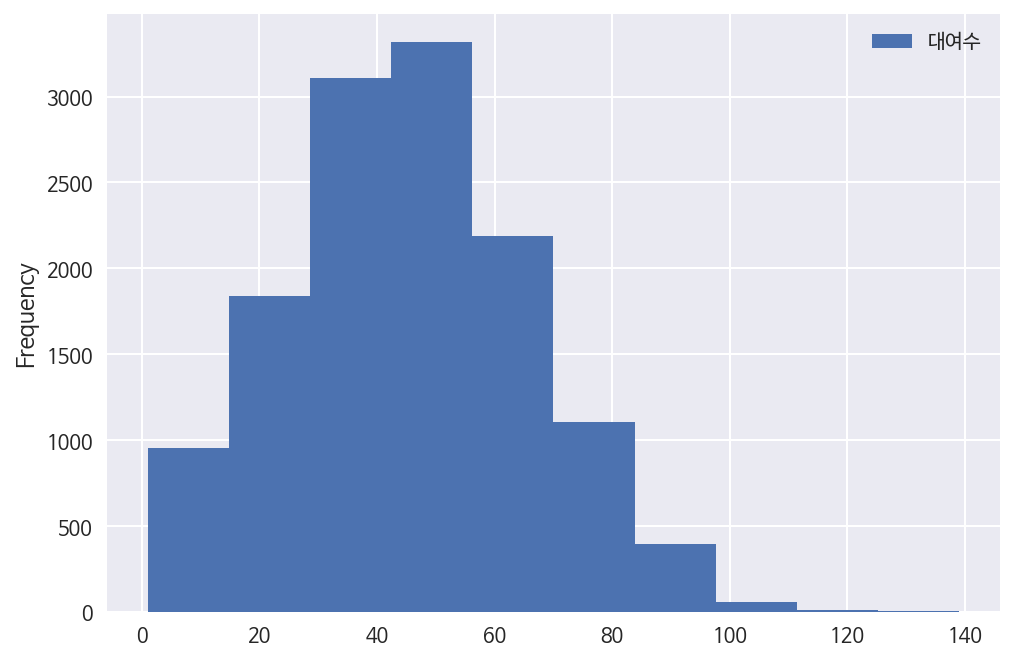

In [46]:
bike_rent_counts.plot.hist()

In [47]:
most_bike_df = df.loc[df['자전거번호'] == bike_describe[2]]
most_bike_df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여시,대여분,대여요일,반납년,반납월,반납일,반납시,반납분,반납요일,같은대여반납소
13282,'SPB-18238',2018-06-16 13:01:05,'2140',' 신림1교 교차로',6,2018-06-16 13:46:40,'1975',' 대림역 1번 출입구 밑',4,45,...,13,1,5,2018,6,16,13,46,5,False
14861,'SPB-18238',2018-06-16 13:47:21,'1975',' 대림역 1번 출입구 밑',4,2018-06-16 14:17:53,'2140',' 신림1교 교차로',6,30,...,13,47,5,2018,6,16,14,17,5,False
18639,'SPB-18238',2018-06-16 15:25:52,'2140',' 신림1교 교차로',6,2018-06-16 16:16:09,'2140',' 신림1교 교차로',2,49,...,15,25,5,2018,6,16,16,16,5,True
22887,'SPB-18238',2018-06-16 17:01:22,'2140',' 신림1교 교차로',2,2018-06-16 18:39:24,'2140',' 신림1교 교차로',1,97,...,17,1,5,2018,6,16,18,39,5,True
28700,'SPB-18238',2018-06-16 18:43:39,'2140',' 신림1교 교차로',1,2018-06-16 19:21:39,'2171',' 서울대입구역 5번출구',12,37,...,18,43,5,2018,6,16,19,21,5,False


In [48]:
most_bike_df['대여대여소명'].value_counts()

' 황금내근린공원'            57
' 서울시립대 정문 앞'          4
' 신림1교 교차로'            4
' 서울신성초등학교'            3
' 서울대입구역 5번출구'         2
' 합정역 7번출구 앞'          2
' 광진광장 교통섬'            2
' 산업은행 앞'              2
' 안암로터리 버스정류장 앞'       2
' 가좌역 4번출구 앞'          2
' 베르가모앞'               2
' 성수역3번출구'             2
' 신설동역8번출구'            1
' 삼부르네상스파크빌'           1
' 종각역 5번출구'            1
' 신촌역(2호선) 7번출구 앞'     1
' 성수2가1동 공영주차장 인근'     1
' 상명대입구'               1
' 북성초교'                1
' 청계8가 사거리'            1
' 종로3가역 2번출구 뒤'        1
' 사루비아 빌딩 앞'           1
' 신림동걷고싶은문화의거리입구'      1
' 청계천 생태교실 앞'          1
' 용답역 1번 출구'           1
' 신설동역 10번출구 앞'        1
' 가리봉동주민센터'            1
' 대방역6번출구'             1
' (구)합정동 주민센터'         1
' 영동대교 북단'             1
                      ..
' 맥스타일 앞'              1
' 홈플러스 면목동점'           1
' 정릉현대힐스테이트 1차 후문'     1
' 마포역 1번출구 뒤'          1
' 도선동 주민센터 앞'          1
' 옥수역 3번출구'            1
' 대림역4번출구'             1
' 충정로역 7번출구 뒤'         1
' 동성중학교 앞'             1


In [49]:
rent_station = most_bike_df['대여대여소명'].unique()
rent_station

array(["' 신림1교 교차로'", "' 대림역 1번 출입구 밑'", "' 서울대입구역 5번출구'", "' 봉림교 교통섬'",
       "' 서울신성초등학교'", "' 구로디지털단지역 앞'", "' 대림역4번출구'", "' 삼부르네상스파크빌'",
       "' 가산동 주민센터'", "' 가리봉동주민센터'", "' 신림역 5번출구'", "' 신림동걷고싶은문화의거리입구'",
       "' 대방역6번출구'", "' 산업은행 앞'", "' IFC몰'", "' 황금내근린공원'",
       "' 서빙고동 주민센터 앞'", "' 북가좌1동 주민센터 '", "' 가좌역 4번출구 앞'", "' 상명대입구'",
       "' 청와대앞길'", "' 종로구청 옆'", "' 삼각산동 주민센터'", "' 정릉현대힐스테이트 1차 후문'",
       "' 돈암초교 입구'", "' 동성중학교 앞'", "' 돈암성당 옆'", "' 맥스타일 앞'",
       "' 포르투갈 대사관 앞'", "' 종로3가역 2번출구 뒤'", "' 청계8가 사거리'",
       "' 안암로터리 버스정류장 앞'", "' 서울시립대 정문 앞'", "' 청량리 기업은행 앞'",
       "' 용답역 1번 출구'", "' 옥수역 3번출구'", "' 청계천 생태교실 앞'", "' 베르가모앞'",
       "' 합정역 7번출구 앞'", "' (구)합정동 주민센터'", "' 마포구민체육센터 앞'", "' 사루비아 빌딩 앞'",
       "' KB국민은행 염창역 지점 앞'", "' 마포역 1번출구 뒤'", "' 신촌역(2호선) 7번출구 앞'",
       "' 광흥창역 2번출구 앞'", "' 서강대 정문 건너편'", "' 북성초교'", "' 충정로역 7번출구 뒤'",
       "' 종각역 5번출구'", "' 세운스퀘어 앞'", "' 동대문역 8번 출구'", "' 신설동역 10번출구 앞'",
       "' 도선동 주민센터 앞'", "' 신설동역8번출구'", "' 영동대교 북단'"

In [66]:
bike_move = []
for s in rent_station:
    bike_move.append(s.strip().replace("'",""))
    
bike_move    

[' 신림1교 교차로',
 ' 대림역 1번 출입구 밑',
 ' 서울대입구역 5번출구',
 ' 봉림교 교통섬',
 ' 서울신성초등학교',
 ' 구로디지털단지역 앞',
 ' 대림역4번출구',
 ' 삼부르네상스파크빌',
 ' 가산동 주민센터',
 ' 가리봉동주민센터',
 ' 신림역 5번출구',
 ' 신림동걷고싶은문화의거리입구',
 ' 대방역6번출구',
 ' 산업은행 앞',
 ' IFC몰',
 ' 황금내근린공원',
 ' 서빙고동 주민센터 앞',
 ' 북가좌1동 주민센터 ',
 ' 가좌역 4번출구 앞',
 ' 상명대입구',
 ' 청와대앞길',
 ' 종로구청 옆',
 ' 삼각산동 주민센터',
 ' 정릉현대힐스테이트 1차 후문',
 ' 돈암초교 입구',
 ' 동성중학교 앞',
 ' 돈암성당 옆',
 ' 맥스타일 앞',
 ' 포르투갈 대사관 앞',
 ' 종로3가역 2번출구 뒤',
 ' 청계8가 사거리',
 ' 안암로터리 버스정류장 앞',
 ' 서울시립대 정문 앞',
 ' 청량리 기업은행 앞',
 ' 용답역 1번 출구',
 ' 옥수역 3번출구',
 ' 청계천 생태교실 앞',
 ' 베르가모앞',
 ' 합정역 7번출구 앞',
 ' (구)합정동 주민센터',
 ' 마포구민체육센터 앞',
 ' 사루비아 빌딩 앞',
 ' KB국민은행 염창역 지점 앞',
 ' 마포역 1번출구 뒤',
 ' 신촌역(2호선) 7번출구 앞',
 ' 광흥창역 2번출구 앞',
 ' 서강대 정문 건너편',
 ' 북성초교',
 ' 충정로역 7번출구 뒤',
 ' 종각역 5번출구',
 ' 세운스퀘어 앞',
 ' 동대문역 8번 출구',
 ' 신설동역 10번출구 앞',
 ' 도선동 주민센터 앞',
 ' 신설동역8번출구',
 ' 영동대교 북단',
 ' 성수역3번출구',
 ' 성수2가1동 공영주차장 인근',
 ' 광진광장 교통섬',
 ' 광진메디칼 앞',
 ' 어린이대공원역6번출구',
 ' 동원사거리',
 ' 세종사이버대학교',
 ' 군자역 7번출구뒤',
 ' 군자지하보도 앞',
 ' 성수아카데미타워 앞',
 ' 홈플러스 면목동

In [71]:
stations = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/opengovlab/bike_rent_station.csv')
stations.shape
stations.head()

,대여소,상태,주소,위도,경도
0,광진교 남단 사거리(디지털프라자앞),운영중,서울특별시 강동구 구천면로 171 376 남단사거리,37.541805,127.124718
1,해공공원(천호동),운영중,서울특별시 강동구 올림픽로 702 265,37.545219,127.125916
2,해공도서관앞,운영중,서울특별시 강동구 올림픽로 702 367,37.543915,127.125458
3,삼성광나루아파트 버스정류장,운영중,서울특별시 강동구 상암로3길 77 암사동 534,37.553349,127.128860
4,롯데캐슬 115동앞,운영중,서울특별시 강동구 양재대로 1665 명일동 304,37.554920,127.142799


In [68]:
bike_move_df = pd.DataFrame(bike_move)
bike_move_df.columns = ['대여소']
print(bike_move_df.shape)
bike_move_df.head()

(67, 1)


,대여소
0,신림1교 교차로
1,대림역 1번 출입구 밑
2,서울대입구역 5번출구
3,봉림교 교통섬
4,서울신성초등학교


In [69]:
bike_move_df = bike_move_df.merge(stations, left_on='대여소', right_on='대여소', how='left')
bike_move_df.shape

(67, 5)

In [70]:
bike_move_df.head()

,대여소,상태,주소,위도,경도
0,신림1교 교차로,NaN,NaN,NaN,NaN
1,대림역 1번 출입구 밑,NaN,NaN,NaN,NaN
2,서울대입구역 5번출구,NaN,NaN,NaN,NaN
3,봉림교 교통섬,NaN,NaN,NaN,NaN
4,서울신성초등학교,NaN,NaN,NaN,NaN


In [58]:
bike_move_df.isnull().sum()

대여소     0
상태     67
주소     67
위도     67
경도     67
dtype: int64